In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor,plot_tree
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [11]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [12]:
dataset = sns.load_dataset('iris')
LE = LabelEncoder()
dataset['species_numerical'] = LE.fit_transform(dataset['species']) 
dataset.head


<bound method NDFrame.head of      sepal_length  sepal_width  petal_length  petal_width    species  \
0             5.1          3.5           1.4          0.2     setosa   
1             4.9          3.0           1.4          0.2     setosa   
2             4.7          3.2           1.3          0.2     setosa   
3             4.6          3.1           1.5          0.2     setosa   
4             5.0          3.6           1.4          0.2     setosa   
..            ...          ...           ...          ...        ...   
145           6.7          3.0           5.2          2.3  virginica   
146           6.3          2.5           5.0          1.9  virginica   
147           6.5          3.0           5.2          2.0  virginica   
148           6.2          3.4           5.4          2.3  virginica   
149           5.9          3.0           5.1          1.8  virginica   

     species_numerical  
0                    0  
1                    0  
2                    0  
3    

In [13]:
X = dataset.drop('species',axis=1)
X.head

<bound method NDFrame.head of      sepal_length  sepal_width  petal_length  petal_width  species_numerical
0             5.1          3.5           1.4          0.2                  0
1             4.9          3.0           1.4          0.2                  0
2             4.7          3.2           1.3          0.2                  0
3             4.6          3.1           1.5          0.2                  0
4             5.0          3.6           1.4          0.2                  0
..            ...          ...           ...          ...                ...
145           6.7          3.0           5.2          2.3                  2
146           6.3          2.5           5.0          1.9                  2
147           6.5          3.0           5.2          2.0                  2
148           6.2          3.4           5.4          2.3                  2
149           5.9          3.0           5.1          1.8                  2

[150 rows x 5 columns]>

In [17]:
y=dataset.species_numerical
y.head

<bound method NDFrame.head of 0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species_numerical, Length: 150, dtype: int32>

In [18]:
model = DecisionTreeRegressor(random_state=0)

In [19]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.30,random_state = 33)
# model training
model.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [20]:
model.score(x_test,y_test)

1.0

<Axes: xlabel='sepal_length', ylabel='petal_width'>

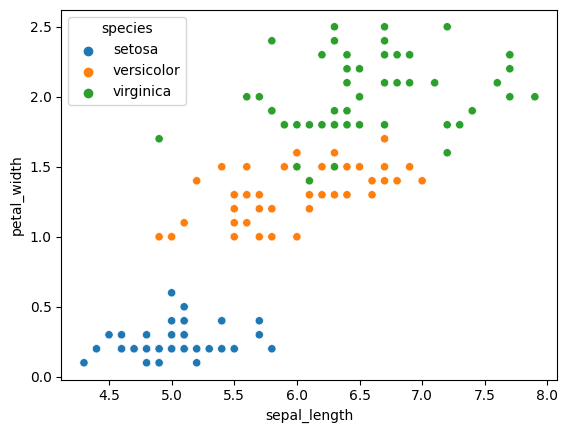

In [22]:
sns.scatterplot(x = dataset['sepal_length'],y =dataset['petal_width'],hue=dataset['species'])

<Axes: >

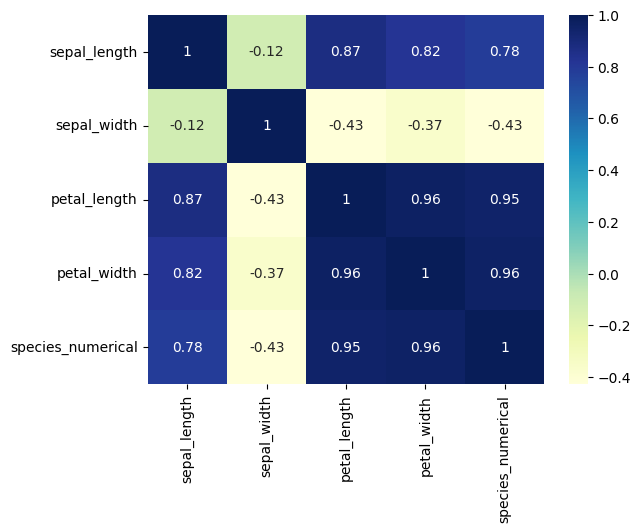

In [27]:
t = dataset.drop('species',axis=1)
correlation= t.corr()
sns.heatmap(correlation,annot=True,cmap='YlGnBu')

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\nsquared_error = 0.661\nsamples = 105\nvalue = 0.924'),
 Text(0.2, 0.5, 'squared_error = 0.0\nsamples = 39\nvalue = 0.0'),
 Text(0.6, 0.5, 'x[4] <= 1.5\nsquared_error = 0.249\nsamples = 66\nvalue = 1.47'),
 Text(0.4, 0.16666666666666666, 'squared_error = 0.0\nsamples = 35\nvalue = 1.0'),
 Text(0.8, 0.16666666666666666, 'squared_error = 0.0\nsamples = 31\nvalue = 2.0')]

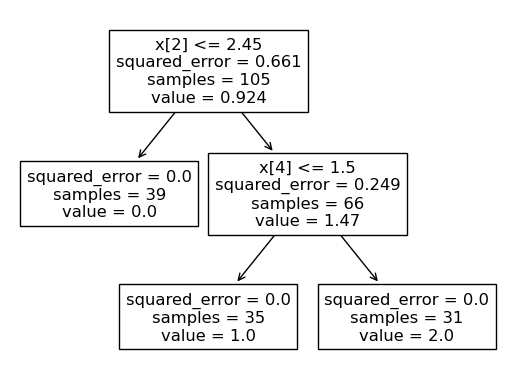

In [30]:
plot_tree(model)